# Worksheet 06

Name:  Yicun Wu
UID: U60263210

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

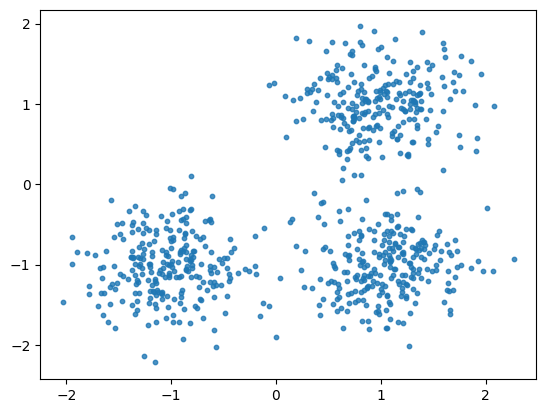

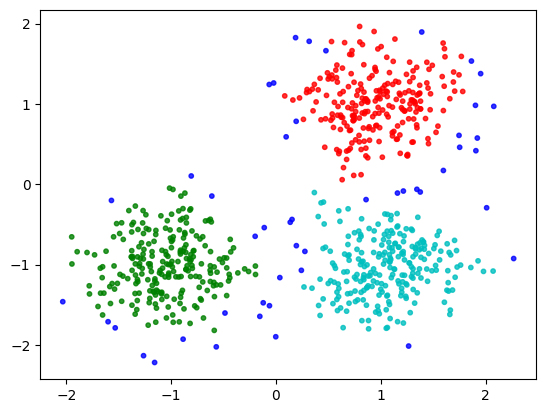

In [8]:
from operator import ne
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def eps_neighborhood(self, P):
        neighborhood = []
        for Pn in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[P] - self.dataset[Pn]) <= self.epsilon:
                neighborhood.append(Pn)
        return neighborhood

    def create_cluster_from(self, P, assignments, label):
        assignments[P] = label
        neighborhood = self.eps_neighborhood(P)
        while neighborhood:
            next_P = neighborhood.pop()

            if assignments[next_P] == label:
                continue

            assignments[next_P] = label
            #TODO: Speed up
            if len(self.eps_neighborhood(next_P)) >= self.min_pts:
                neighborhood += self.eps_neighborhood(next_P)
                
        return assignments

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        assignments = [0 for _ in range(len(self.dataset))]
        label = 0
        for P in range(len(self.dataset)):
            if assignments[P] != 0:
                continue
            
            if len(self.eps_neighborhood(P)) >= self.min_pts:
                #Found a core point
                assignments = self.create_cluster_from(P, assignments, label)
                label += 1
        return assignments

clustering = DBC(X, 5, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()